In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [713]:
df=pd.read_csv("Absenteeism-data.csv")

In [714]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [715]:
#Creating copy of the dataset
cdf=df.copy()
cdf.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [716]:
type(cdf)

pandas.core.frame.DataFrame

In [717]:
#To dipslay entire dataset
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

In [718]:
#display(cdf)

In [719]:
#To check for any missing values in it we can print a concise summary of the data frame.
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [720]:
cdf=cdf.drop('ID',axis=1) 
cdf

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [721]:
#Analysing Reason for absence column
cdf['Reason for Absence']

0      26
1       0
2      23
3       7
4      23
       ..
695    10
696     6
697    10
698    23
699    28
Name: Reason for Absence, Length: 700, dtype: int64

In [722]:
#To check the highest and lowest values
cdf['Reason for Absence'].max()

28

In [723]:
cdf['Reason for Absence'].min()

0

In [724]:
cdf['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [725]:
#To check how many distinct elements in the column
len(cdf['Reason for Absence'].unique())

28

In [726]:
sorted(cdf['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [727]:
#Splitting reasons for absence info with multiple dummy variables
reason_columns=pd.get_dummies(cdf['Reason for Absence'])
reason_columns=reason_columns.astype('int')
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [728]:
reason_columns['check']=reason_columns.sum(axis=1)
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [729]:
#To check if the column check has one in each row
reason_columns['check'].sum(axis=0)

700

In [730]:
reason_columns['check'].unique()

array([1], dtype=int64)

In [731]:
#The validity of the reasons_columns has check so we can drop the check column
reason_columns=reason_columns.drop(['check'],axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [732]:
#Working with dummy variables a statistical approach
#Removing 0th column dummy variable
reason_columns=pd.get_dummies(cdf['Reason for Absence'],drop_first=True)
reason_columns=reason_columns.astype('int')
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [733]:
#grouping the dummy variable into 4 categories based on common characteristic
cdf.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [734]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [735]:
cdf=cdf.drop(['Reason for Absence'],axis=1)
cdf.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [736]:
reason_columns.loc[:,1:14]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [737]:
reason_columns.loc[:,15:17]

,15,16,17
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
695,0,0,0
696,0,0,0
697,0,0,0
698,0,0,0


In [738]:
reason_columns.loc[:,18:21]

,18,19,21
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
695,0,0,0
696,0,0,0
697,0,0,0
698,0,0,0


In [739]:
reason_columns.loc[:,22:28]

,22,23,24,25,26,27,28
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0
696,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0
698,0,1,0,0,0,0,0


In [740]:
reason_type_1=reason_columns.loc[:,1:14].max(axis=1)
reason_type_2=reason_columns.loc[:,15:17].max(axis=1)
reason_type_3=reason_columns.loc[:,18:21].max(axis=1)
reason_type_4=reason_columns.loc[:,22:28].max(axis=1)

In [741]:
reason_type_1.head()

0    0
1    0
2    0
3    1
4    0
dtype: int32

In [742]:
reason_type_2.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [743]:
reason_type_3.tail()

695    0
696    0
697    0
698    0
699    0
dtype: int32

In [744]:
reason_type_4.tail()

695    0
696    0
697    0
698    1
699    1
dtype: int32

In [745]:
#Concatenating columns in a pandas data frame
cdf=pd.concat([cdf,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
cdf.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [746]:
cdf.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [747]:
column_names=['Date','Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Education',
                               'Children', 'Pets', 'Absenteeism Time in Hours','Reason_1', 'Reason_2','Reason_3','Reason_4']

In [748]:
cdf.columns=column_names

In [749]:
cdf.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [750]:
column_names=['Reason_1', 'Reason_2','Reason_3','Reason_4','Date', 'Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Education',
                               'Children', 'Pets', 'Absenteeism Time in Hours']
column_names_reordered=column_names
cdf=cdf[column_names_reordered]
cdf.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [752]:
#working on date column

In [753]:
cdf_reason_mod=cdf.copy()

In [754]:
cdf_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [755]:
cdf_reason_mod['Date']

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
          ...    
695    23/05/2018
696    23/05/2018
697    24/05/2018
698    24/05/2018
699    31/05/2018
Name: Date, Length: 700, dtype: object

In [756]:
type(cdf_reason_mod['Date'])

pandas.core.series.Series

In [757]:
cdf_reason_mod['Date'][0]

'07/07/2015'

In [758]:
type(cdf_reason_mod['Date'][0])

str

In [759]:
cdf_reason_mod['Date']= pd.to_datetime(cdf_reason_mod['Date'],format='mixed')
cdf_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2


In [760]:
#Using timestamp
cdf_reason_mod['Date']= pd.to_datetime(cdf_reason_mod['Date'],format='%d/%m/%Y')
print(cdf_reason_mod['Date'])

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]


In [761]:
type(cdf_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [762]:
cdf_reason_mod['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700 entries, 0 to 699
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
700 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.6 KB


In [763]:
#Extracting month from date column
cdf_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [764]:
#To extract only month
cdf_reason_mod['Date'][0].month

7

In [765]:
cdf_reason_mod['Date'][0].year

2015

In [766]:
#Creating month value column
list_months=[]
list_months

[]

In [767]:
for i in range(cdf_reason_mod.shape[0]):
        list_months.append(cdf_reason_mod['Date'][i].month)
list_months

[7,
 7,
 7,
 7,
 7,
 10,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 12,
 3,
 10,
 8,
 8,
 8,
 4,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 4,
 8,
 8,
 8,
 1,
 7,
 1,
 8,
 9,
 9,
 9,
 9,
 4,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 6,
 10,
 10,
 10,
 10,
 10,
 6,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 4,
 5,
 12,
 11,
 2,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2,
 10,
 11,
 11,
 1,
 1,
 2,
 2,
 3,
 4,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 12,
 12,
 6,
 4,
 5,
 5,
 6,
 7,
 7,
 8,
 11,
 12,
 12,
 1,
 1,
 1,
 11,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 10,
 11,
 11,
 12,
 12,
 8,
 9,
 2,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 8,
 3,
 3,
 2,
 3,
 4,
 4,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 4,
 12,
 4,
 4,
 4,
 4,
 6,
 7,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 4,
 4,
 5,
 2,
 3,
 3,
 11,
 9,
 10,
 4,
 11,
 5,
 5,
 5,
 5,
 11,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 7,
 8,
 9,
 10,
 6,
 6

In [768]:
len(list_months)

700

In [769]:
#creating new column in our table
cdf_reason_mod['Month_value']=list_months
cdf_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8,5
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3,5
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8,5
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2,5


In [770]:
#Creating Day of the week columns
cdf_reason_mod['Date'][699].weekday()

3

In [771]:
cdf_reason_mod['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [772]:
#creating new column containing week days
list_weekdays=[]
list_weekdays

[]

In [773]:
for i in range(cdf_reason_mod.shape[0]):
        list_weekdays.append(cdf_reason_mod['Date'][i].weekday)
list_weekdays

[<bound method Timestamp.weekday of Timestamp('2015-07-07 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-14 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-15 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-16 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-23 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-10-07 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-17 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-24 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-06-07 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-13 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-20 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-14 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-15 00:00:00')>,
 <bound method Timestamp.weekday of Timestamp('2015-07-15 00:00:00')>,
 <boun

In [774]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [775]:
cdf_reason_mod['Day of week']=cdf_reason_mod['Date'].apply(date_to_weekday)
cdf_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [776]:
#Modifying Education Column
cdf_reason_mod['Education']

0      1
1      1
2      1
3      1
4      1
      ..
695    2
696    1
697    2
698    3
699    1
Name: Education, Length: 700, dtype: int64

In [777]:
cdf_reason_mod['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [778]:
cdf_reason_mod['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [779]:
cdf_reason_mod['Education']=cdf_reason_mod['Education'].map({1:0,2:1,3:1,4:1})
cdf_reason_mod['Education']

0      0
1      0
2      0
3      0
4      0
      ..
695    1
696    0
697    1
698    1
699    0
Name: Education, Length: 700, dtype: int64

In [780]:
cdf_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


In [781]:
cdf_reason_mod['Education'].unique()

array([0, 1], dtype=int64)

In [782]:
cdf_reason_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [783]:
#Creating final checkpoints
cdf_reason_date_mod=pd.DataFrame(cdf_reason_mod)
cdf_cleaned=cdf_reason_date_mod.copy()
cdf_cleaned

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,1,2,0,8,5,2
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,0,1,2,3,5,2
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,1,0,0,8,5,3
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,1,0,0,2,5,3


In [784]:
cdf.describe()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.250000,0.008571,0.090000,0.597143,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,0.433322,0.092250,0.286386,0.490823,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,0.000000,0.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,0.250000,0.000000,0.000000,1.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


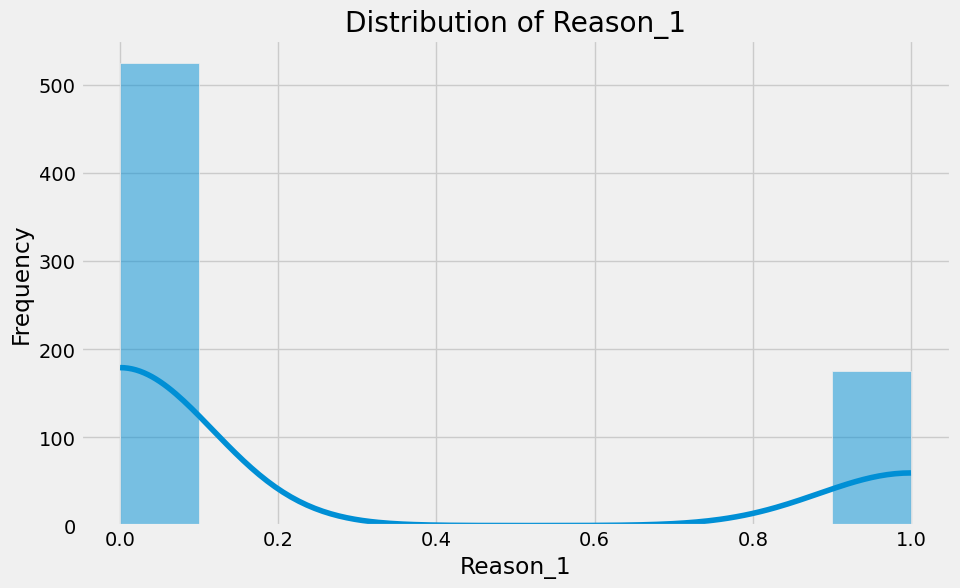

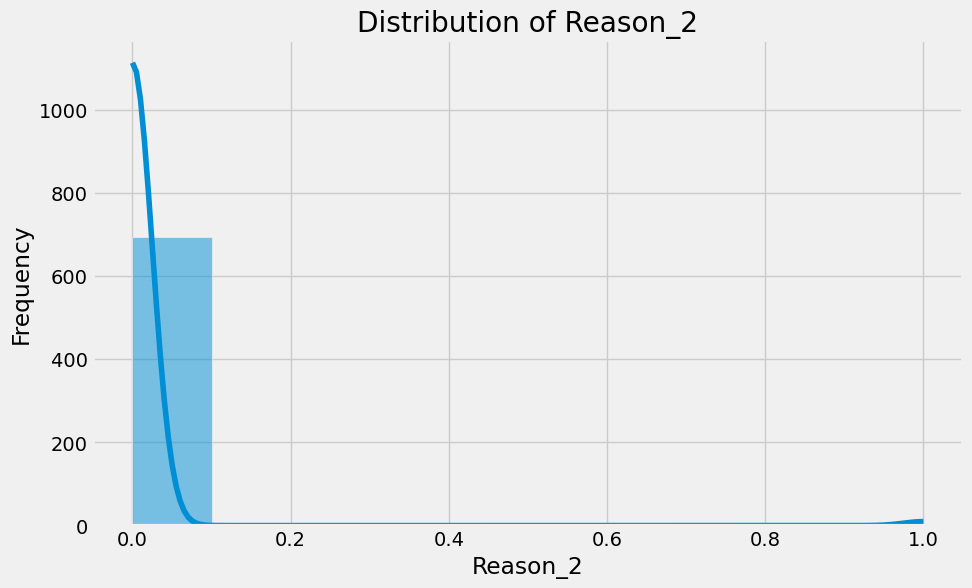

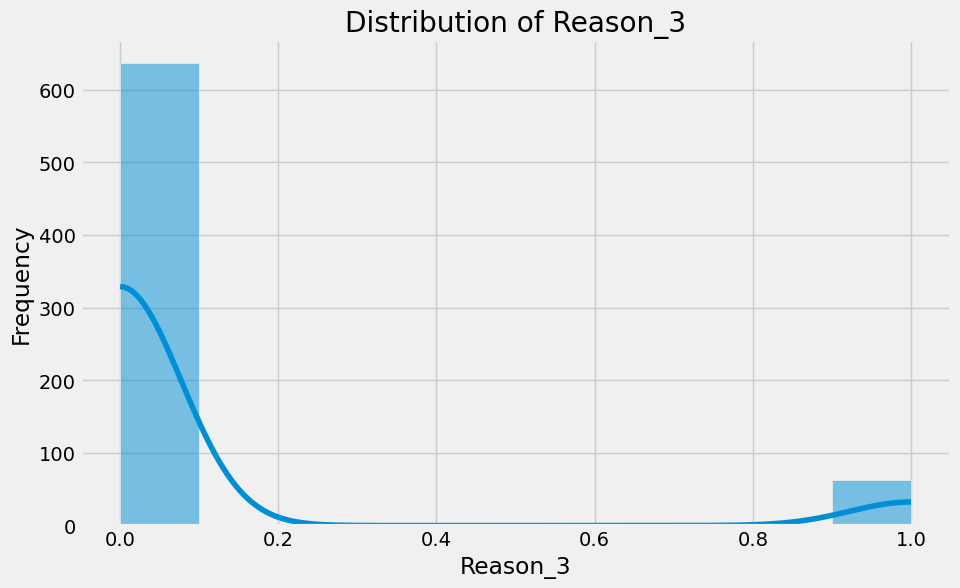

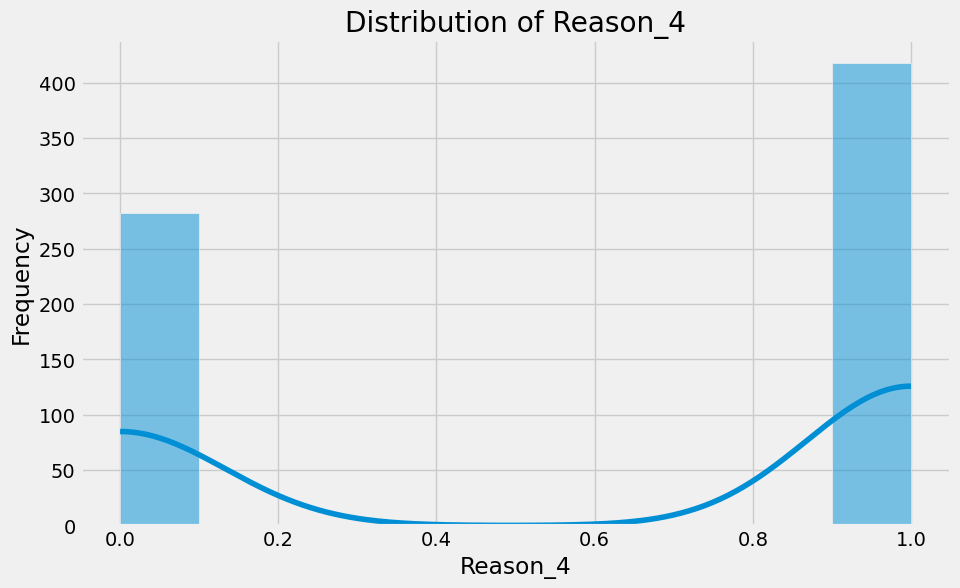

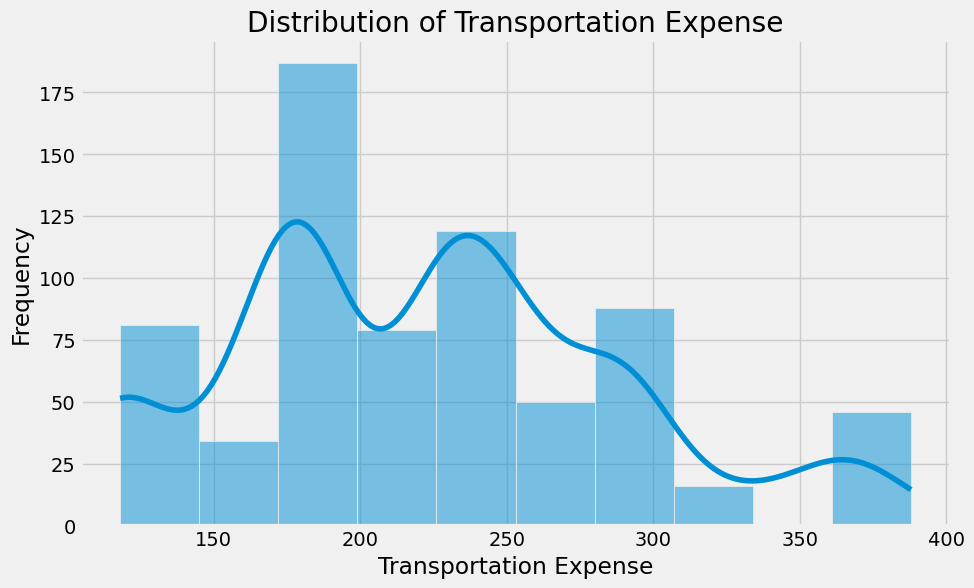

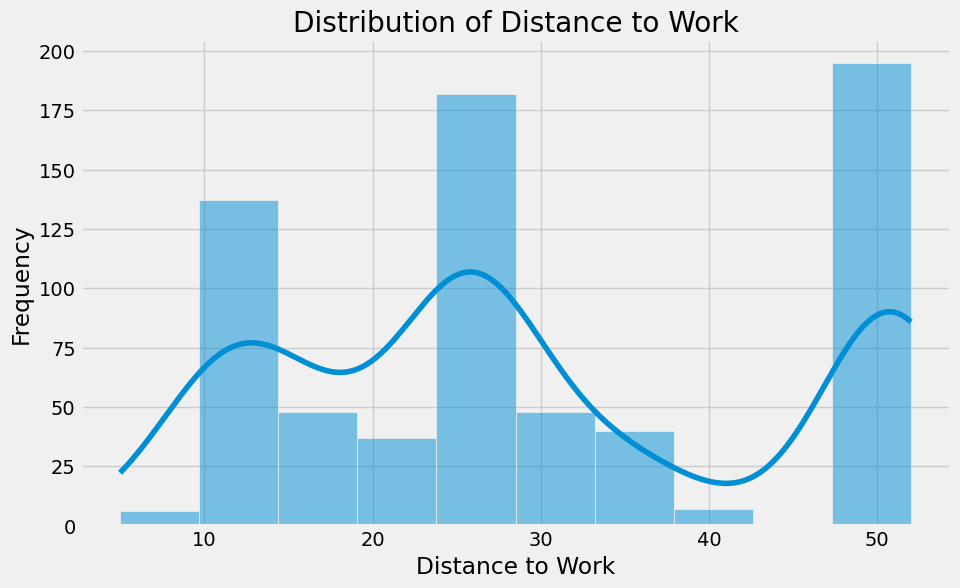

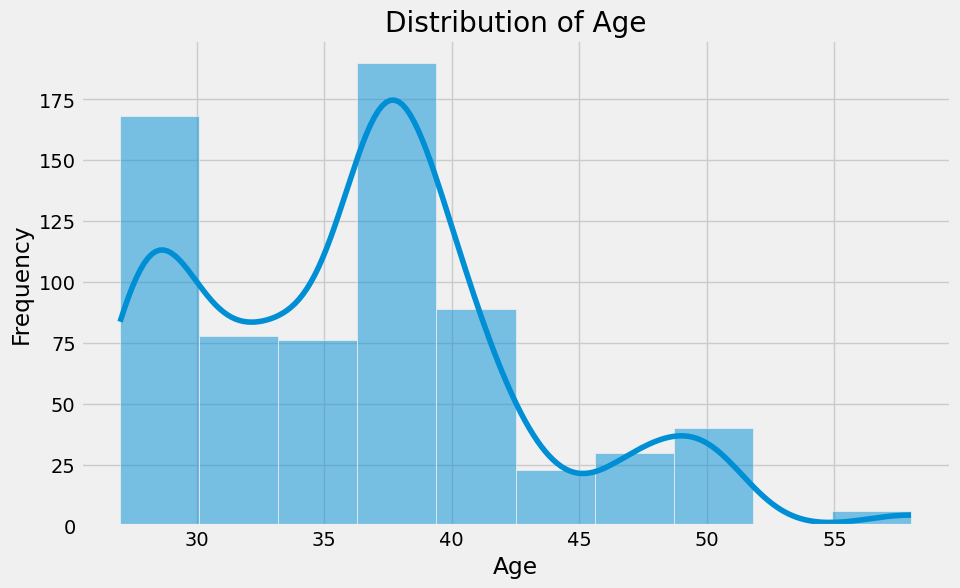

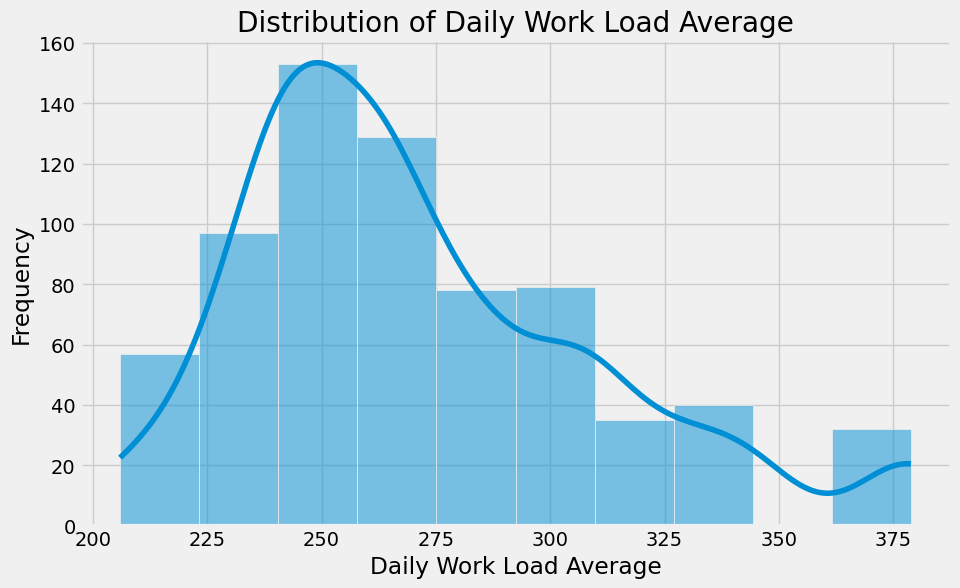

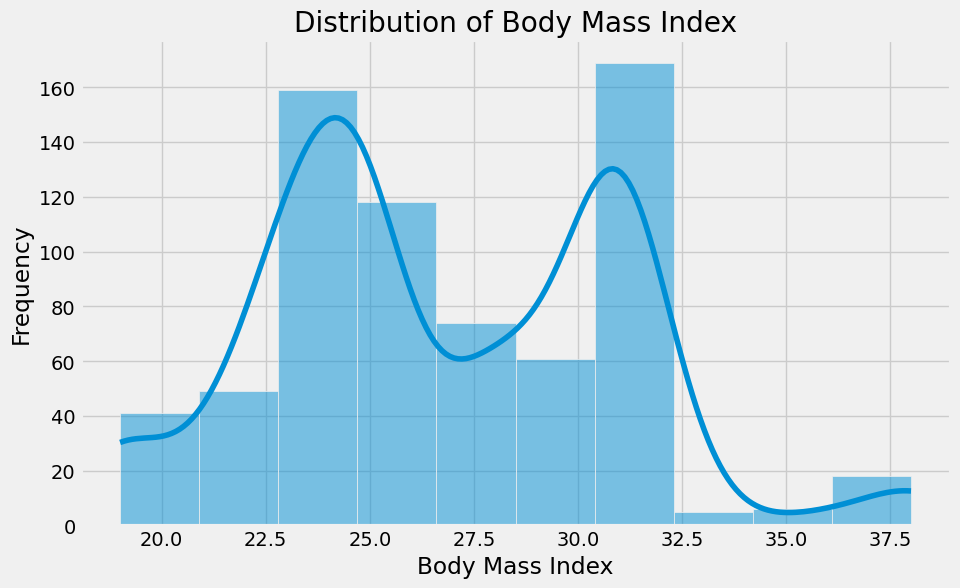

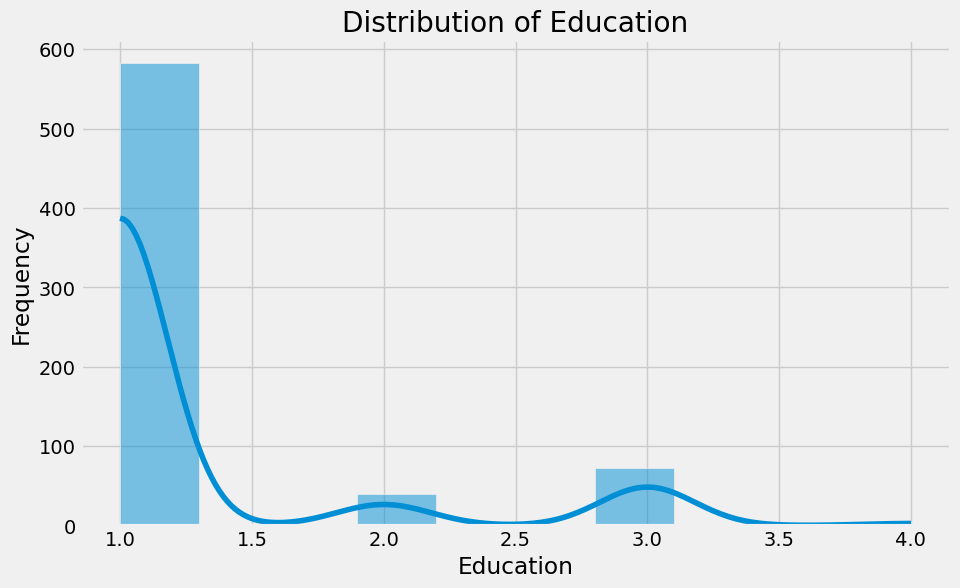

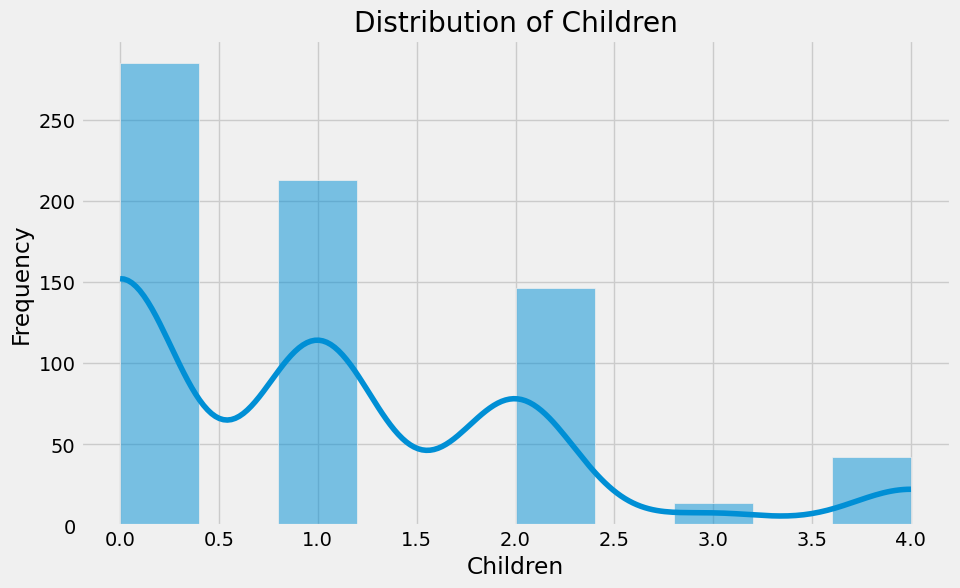

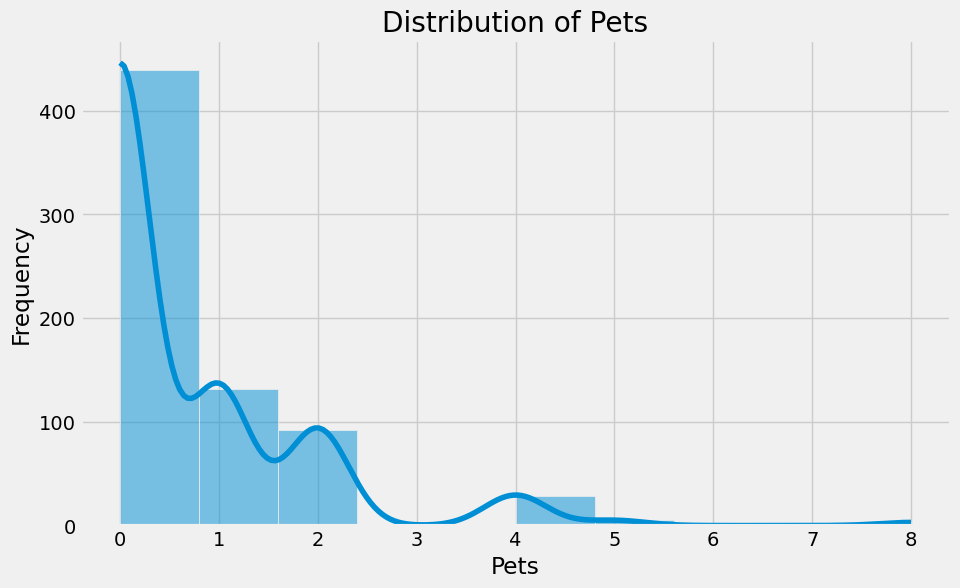

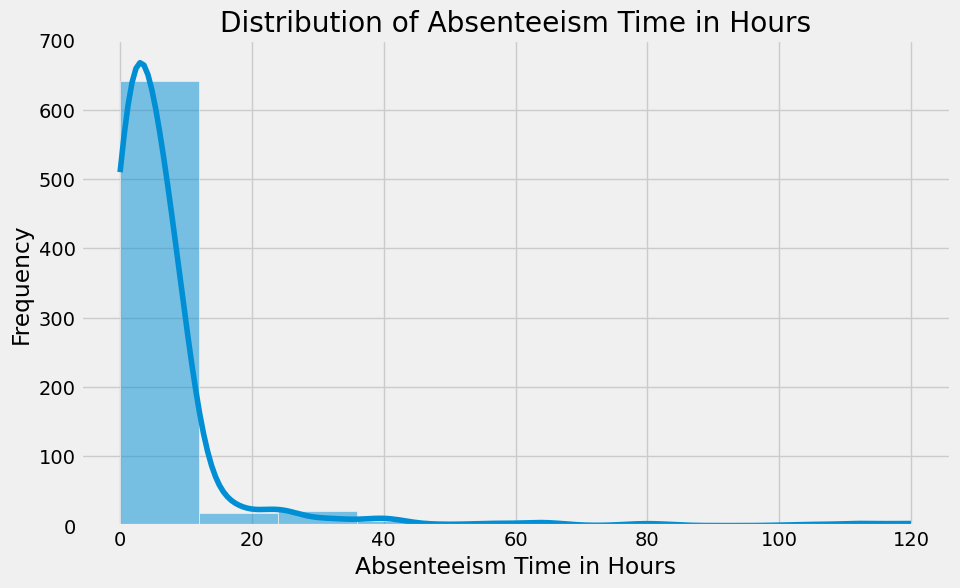

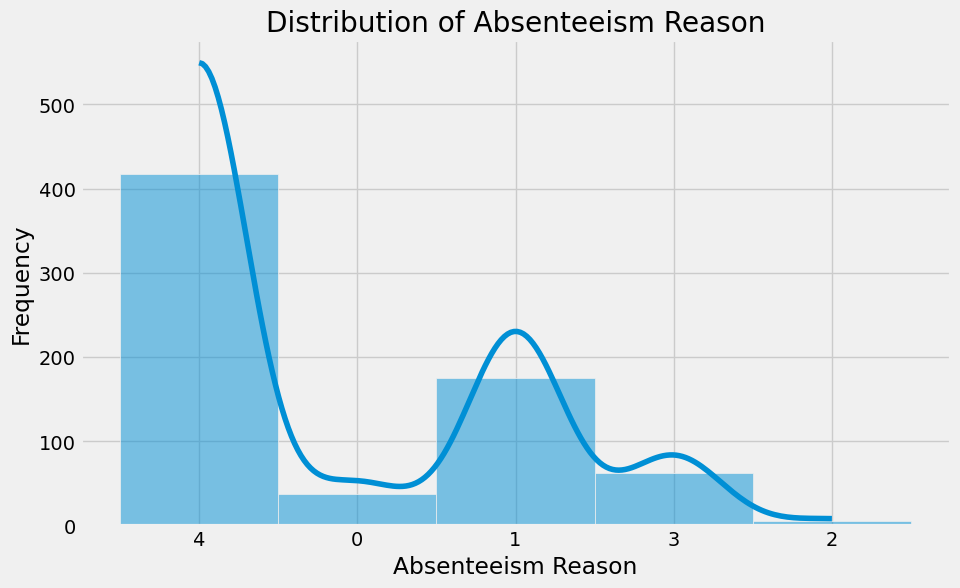

In [801]:
for col in cdf :
     if col not in['Date']:
        plt.style.use("fivethirtyeight")
        plt.figure(figsize=(10,6))
        sns.histplot(cdf, x=col, kde=True, bins=10)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

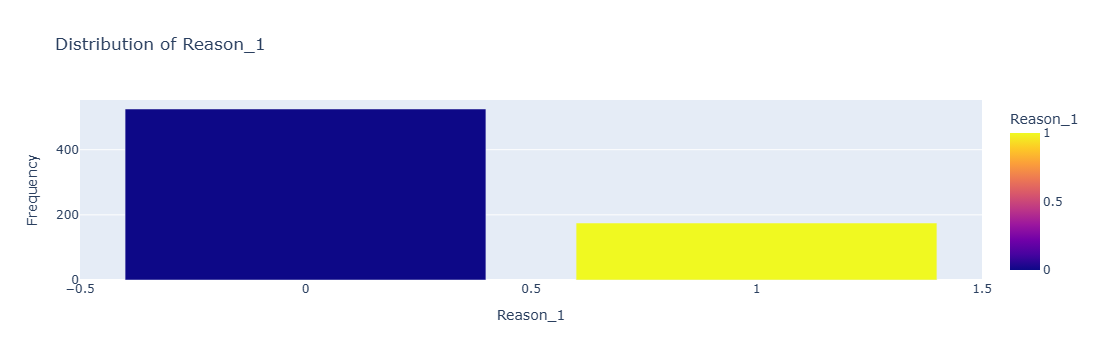

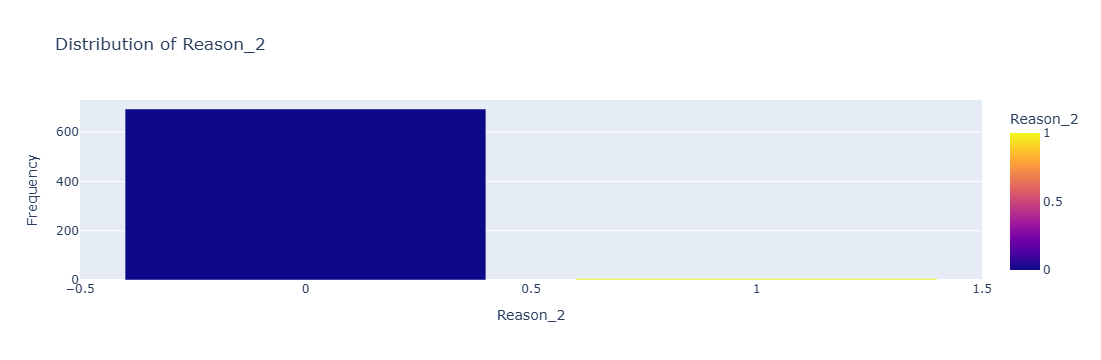

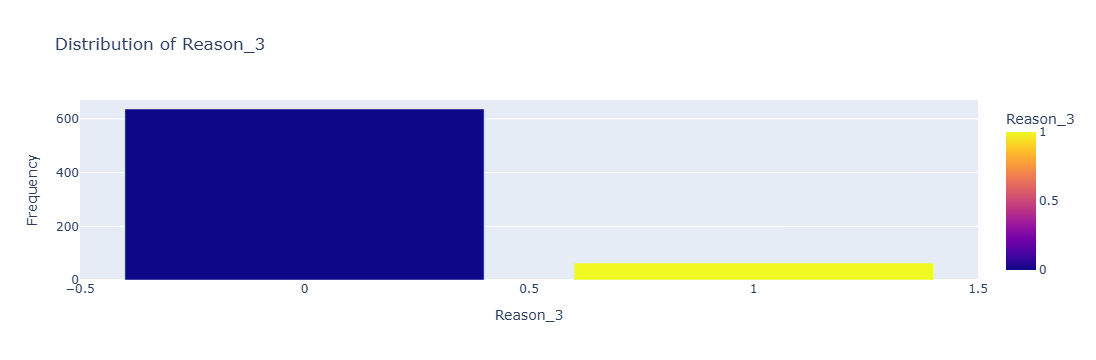

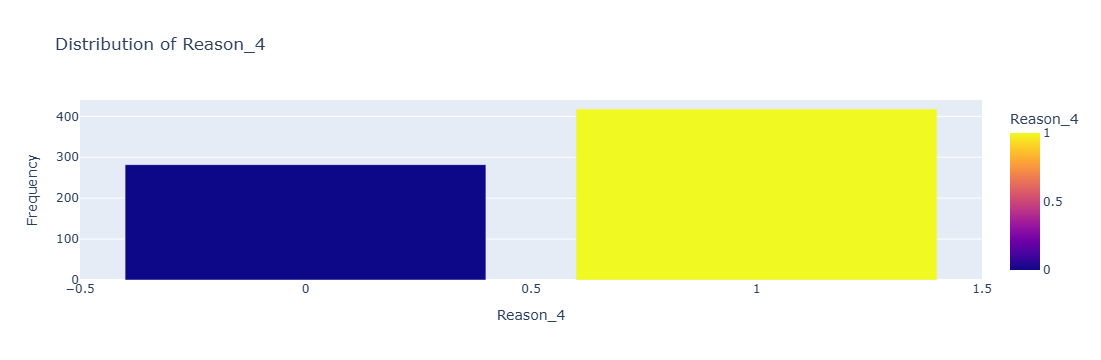

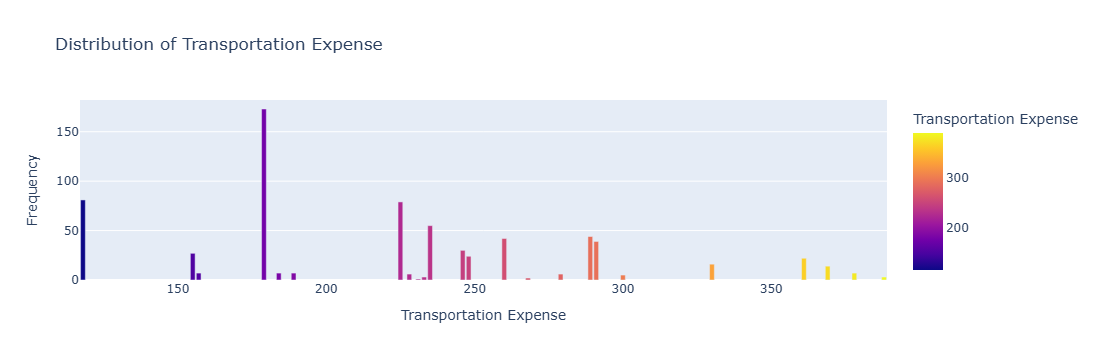

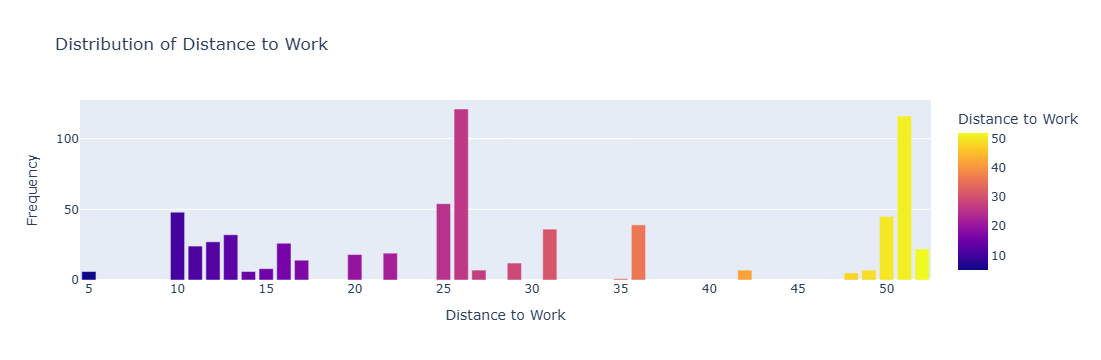

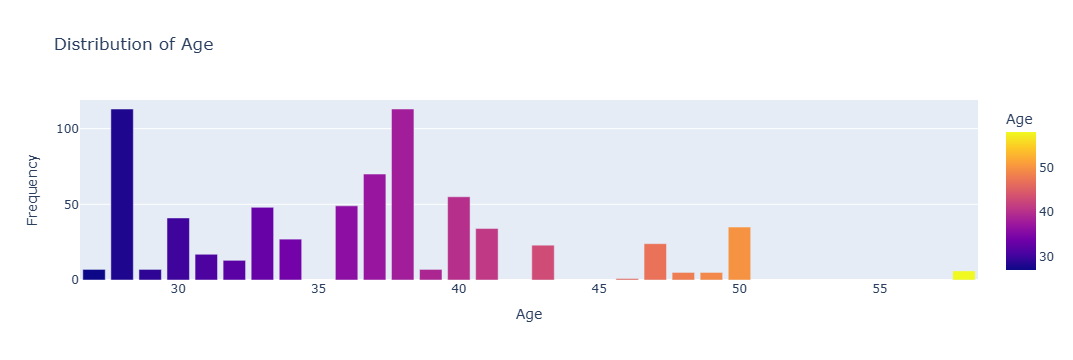

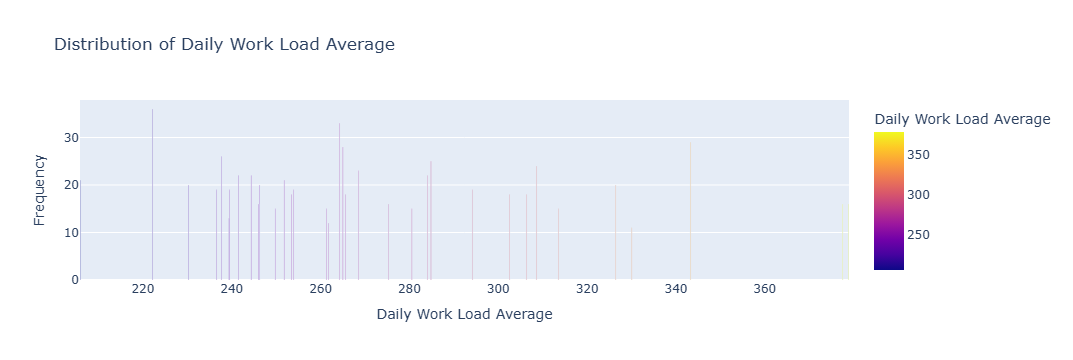

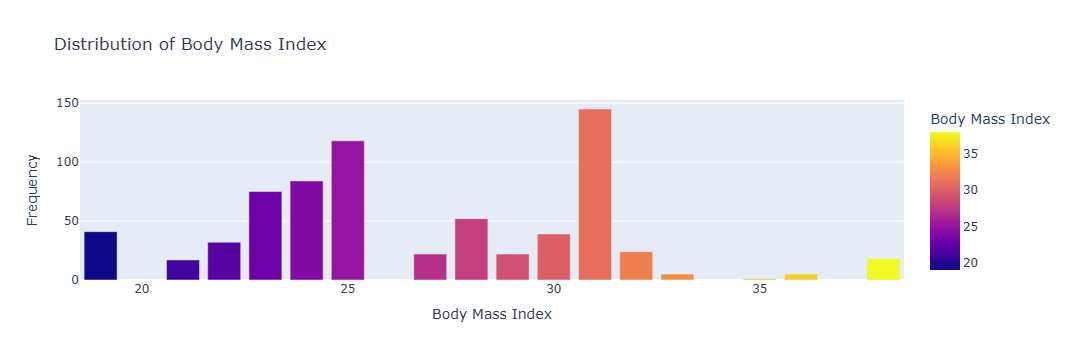

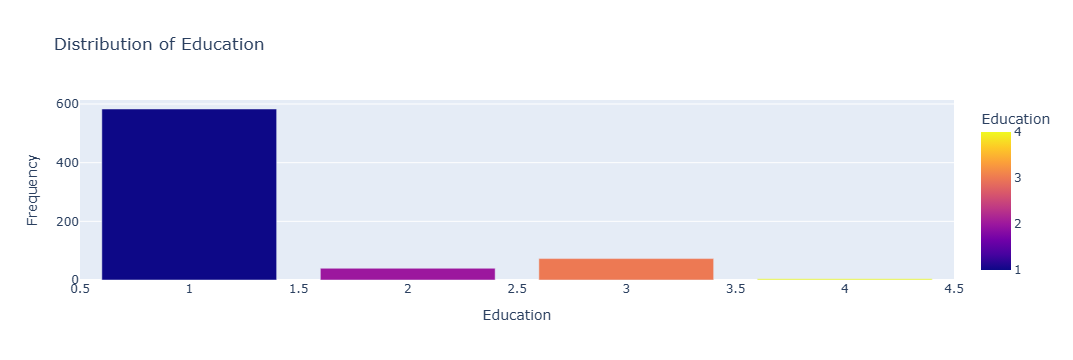

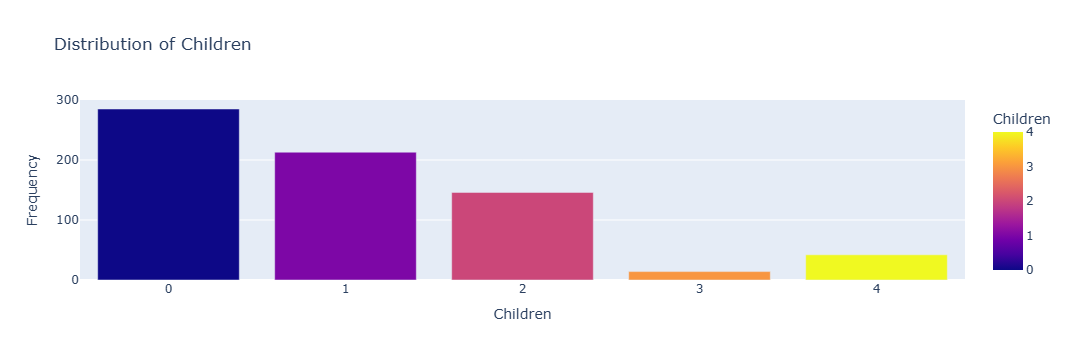

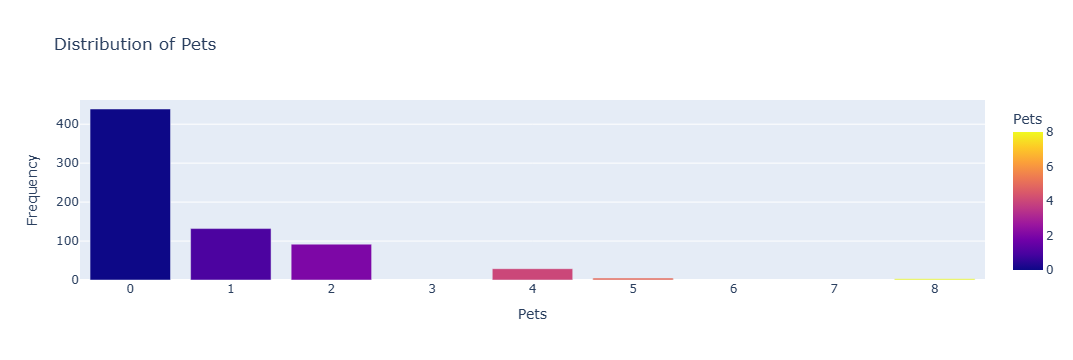

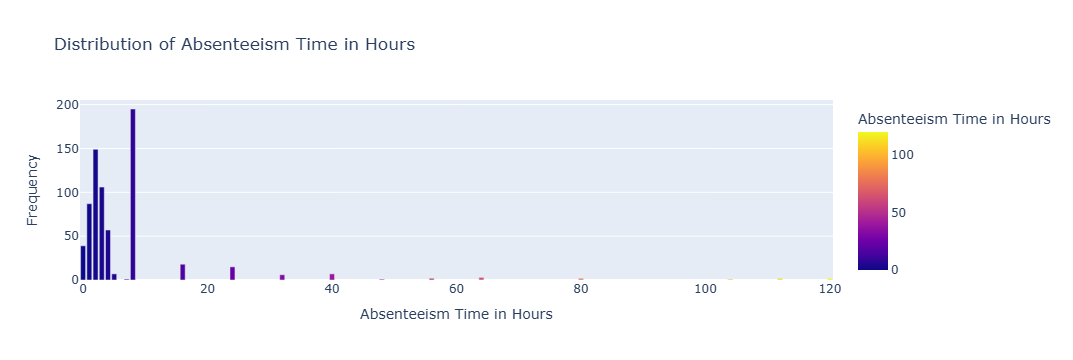

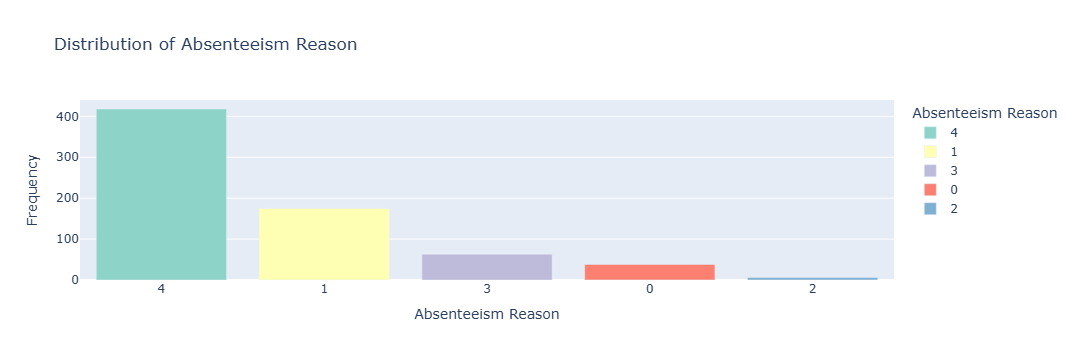

In [802]:
for col in cdf:
    if col not in['Date']:
        # Calculate value counts for the current column
        count_prim = cdf[col].value_counts().reset_index()
        count_prim.columns = [col, 'Frequency']
    
        # Create a bar plot using Plotly Express
        fig = px.bar(count_prim, 
                 x=col, 
                 y='Frequency', 
                 color=col, 
                 title=f'Distribution of {col}',
                 labels={col: col, 'Frequency': 'Frequency'},
                 color_discrete_sequence=px.colors.qualitative.Set3)  # Use a discrete color palette

        # Show the plot
        fig.show()


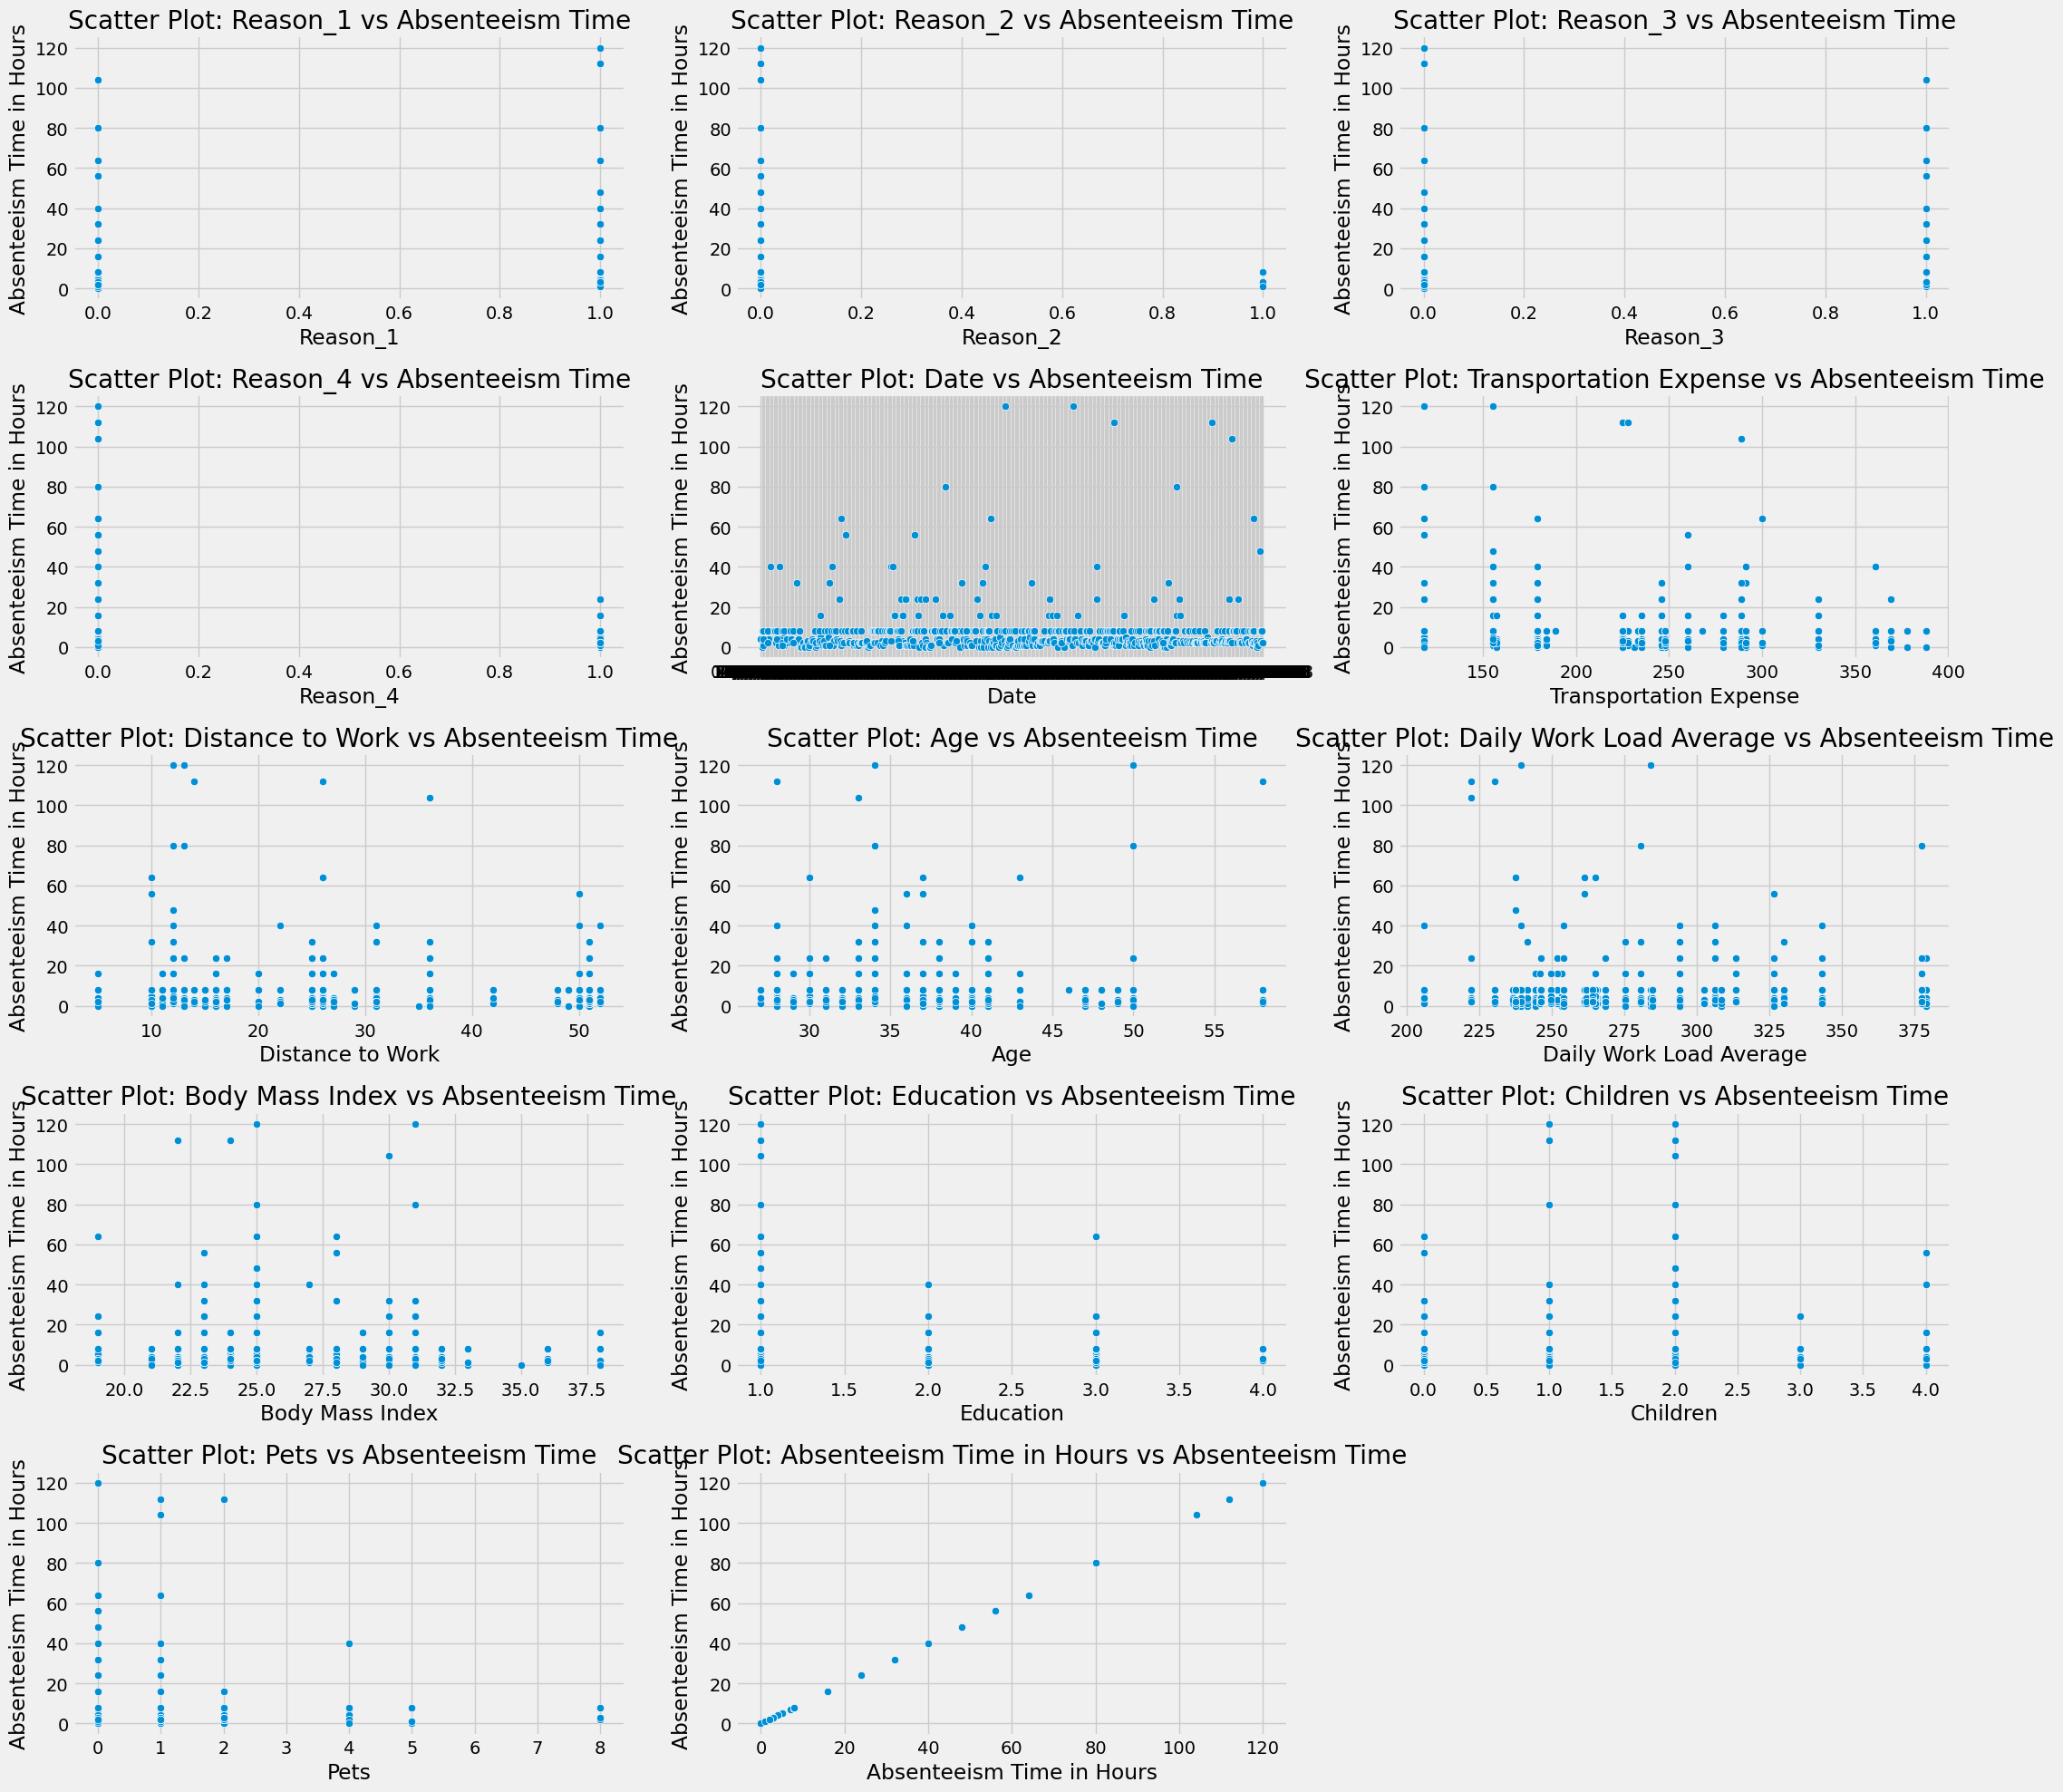

In [803]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Example list of numerical columns (you can replace this with your actual list)
numerical_cols =['Reason_1','Reason_2','Reason_3','Reason_4','Date','Transportation Expense','Distance to Work','Age','Daily Work Load Average',
                  'Body Mass Index','Education','Children','Pets','Absenteeism Time in Hours']

# Calculate the number of rows and columns needed for the grid
num_plots = len(numerical_cols)  # Total number of columns you want to plot
cols = 3  # Set number of columns
rows = math.ceil(num_plots / cols)  # Calculate the number of rows

plt.figure(figsize=(22, 4 * rows))  # Adjust the figure size based on the number of rows

# Loop to create scatter plots for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamic number of rows and columns
    sns.scatterplot(x=cdf[col], y=cdf['Absenteeism Time in Hours'])
    plt.title(f'Scatter Plot: {col} vs Absenteeism Time')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [804]:
cdf['Absenteeism Reason'] = cdf['Reason_1'].astype(str) + ', ' + cdf['Reason_2'].astype(str) + ', ' + cdf['Reason_3'].astype(str) + ', ' + cdf['Reason_4'].astype(str)

In [805]:
cdf['Absenteeism Reason'] 

0      0, 0, 0, 1
1      0, 0, 0, 0
2      0, 0, 0, 1
3      1, 0, 0, 0
4      0, 0, 0, 1
          ...    
695    1, 0, 0, 0
696    1, 0, 0, 0
697    1, 0, 0, 0
698    0, 0, 0, 1
699    0, 0, 0, 1
Name: Absenteeism Reason, Length: 700, dtype: object

In [806]:
cdf['Absenteeism Reason'] = cdf[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].mode(axis=1)[0]

In [807]:
cdf['Absenteeism Reason'] 

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Name: Absenteeism Reason, Length: 700, dtype: int32

In [808]:
cdf['Absenteeism Reason'] = cdf[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].apply(lambda row: ', '.join(row[row != 0].astype(str)), axis=1)

In [809]:
cdf['Absenteeism Reason']

0      1
1       
2      1
3      1
4      1
      ..
695    1
696    1
697    1
698    1
699    1
Name: Absenteeism Reason, Length: 700, dtype: object

In [810]:
# Creating DataFrame
cdf = pd.DataFrame(cdf)

# Reason mapping
reason_map = {1: '1', 2: '2', 3: '3', 4: '4'}

# Aggregating the reasons: check which column has 1 and assign the respective reason
def map_absenteeism_reason(row):
    for i in range(1, 5):
        if row[f'Reason_{i}'] == 1:
            return reason_map[i]
    return '0'

cdf['Absenteeism Reason'] = cdf.apply(map_absenteeism_reason, axis=1)
#print(cdf[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Absenteeism Reason']])


In [811]:
cdf.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Absenteeism Reason
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2,4
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4,1
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2,4


In [812]:
#Split the dataset into training and testing sets.

In [813]:
from sklearn.model_selection import train_test_split

X = cdf.drop(columns=['Absenteeism Time in Hours', 'Date'])  # Exclude target variable and Date column
y = cdf['Absenteeism Time in Hours']  # or choose one of the reasons for classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [814]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')

Mean Squared Error (Linear Regression): 138.66086555715623


In [815]:
from sklearn.linear_model import LinearRegression
import pandas as pd
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
coefficients = model_lr.coef_
# Create DataFrame to store feature names and their corresponding coefficients
importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
# Sort by the absolute value of coefficients to rank features by importance
importance_df_lr['Abs_Coefficient'] = importance_df_lr['Coefficient'].abs()
importance_df_lr = importance_df_lr.sort_values(by='Abs_Coefficient', ascending=False)
# Exclude 'Absenteeism Reason' if it exists in the DataFrame
importance_df_lr = importance_df_lr[importance_df_lr['Feature'] != 'Absenteeism Reason']
# Print the feature importances (sorted by absolute coefficient)
print(importance_df_lr[['Feature', 'Coefficient', 'Abs_Coefficient']])


                    Feature  Coefficient  Abs_Coefficient
0                  Reason_1    10.984837        10.984837
2                  Reason_3     7.761037         7.761037
3                  Reason_4    -7.435505         7.435505
9                 Education    -2.437949         2.437949
1                  Reason_2    -0.758502         0.758502
10                 Children     0.710861         0.710861
11                     Pets    -0.316562         0.316562
5          Distance to Work    -0.068796         0.068796
6                       Age     0.043440         0.043440
8           Body Mass Index    -0.035708         0.035708
7   Daily Work Load Average    -0.021391         0.021391
4    Transportation Expense     0.006110         0.006110


In [816]:
#positive coefficients  Reason_1,Reason_3 and Children will increase the target variable Absenteeism as they increase.
